<Center><h3> Business Case : Employee Attrition </Center></h3>

### Import Section 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
%matplotlib inline

In [0]:
#from google.colab import files
#uploaded = files.upload()
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = '1OgHMtT_iNQo2okFPDjVigCcNNi5C5sFG'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data_employee.csv')


In [5]:
#for fn in uploaded.keys():
 # print('User uploaded file "{name}" with length {length} bytes'.format(
  #    name=fn, length=len(uploaded[fn])))

!pip install -q xlrd

import pandas as pd
data = pd.read_csv('data_employee.csv', sep=';')
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [7]:
np.unique(data['department']).count()

AttributeError: ignored

## Exploratory data analysis

In [0]:
#filename = 'data_employee.csv'
#data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')), sep=';')
#data = pd.read_csv(filename, sep=';')
#data.head(5)

In [5]:
data.dtypes

name                       object
satisfaction_level        float64
last_evaluation           float64
number_projects             int64
average_monthly_hours       int64
time_spent_company          int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
department                 object
salary                     object
salary_level                int64
dtype: object

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.count()

name                      14998
satisfaction_level        14999
last_evaluation           14999
number_projects           14999
average_monthly_hours     14999
time_spent_company        14999
work_accident             14999
left                      14999
promotion_last_5_years    14999
department                14999
salary                    14999
salary_level              14999
dtype: int64

In [8]:
# counting missing values 
data.isnull().sum()

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [9]:
data.isnull().sum().sum()

1

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
('number of unique department : ', 10)


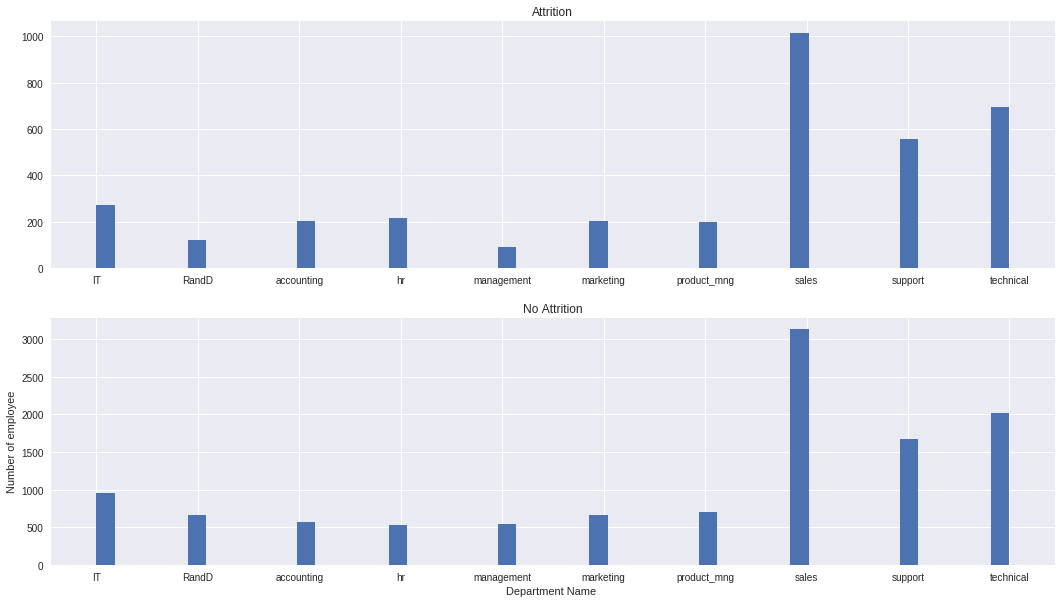

In [10]:
print(np.unique(data['department']))
print('number of unique department : ', len(np.unique(data['department'])))

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))

bins = 50


ax1.hist(data.department[data.left == 1], bins = bins)
ax1.set_title('Attrition')


ax2.hist(data.department[data.left == 0], bins = bins)
ax2.set_title('No Attrition')

plt.xlabel('Department Name ')
plt.ylabel('Number of employee')
plt.show()

Text(0,0.5,u'Number of employees who stayed')

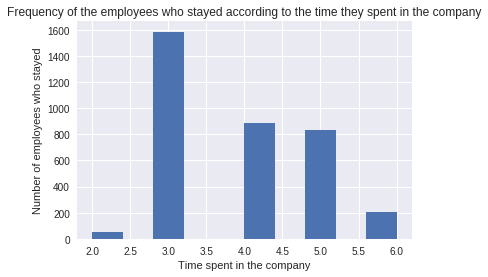

In [11]:
time_spent = data['time_spent_company'][data['left'] == 1].plot(kind='hist',
                                                   x='Time spent in the company', y='Number of employees who stayed',                       
                                                   title = 'Frequency of the employees who stayed according to the time they spent in the company')
time_spent.set_xlabel('Time spent in the company')
time_spent.set_ylabel('Number of employees who stayed')

Text(0,0.5,u'Number of employees who left')

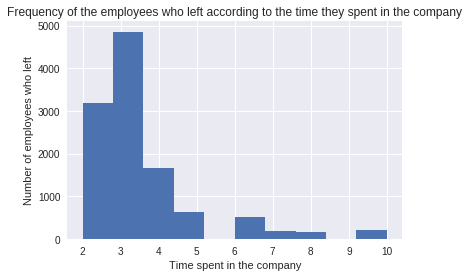

In [12]:
time_spent = data['time_spent_company'][data['left'] == 0].plot(kind='hist', 
                                                                title = 'Frequency of the employees who left according to the time they spent in the company')
time_spent.set_xlabel('Time spent in the company')
time_spent.set_ylabel('Number of employees who left')

In [0]:
data = data.fillna('')

['high' 'low' 'medium']
('Class of salaries : ', 3)


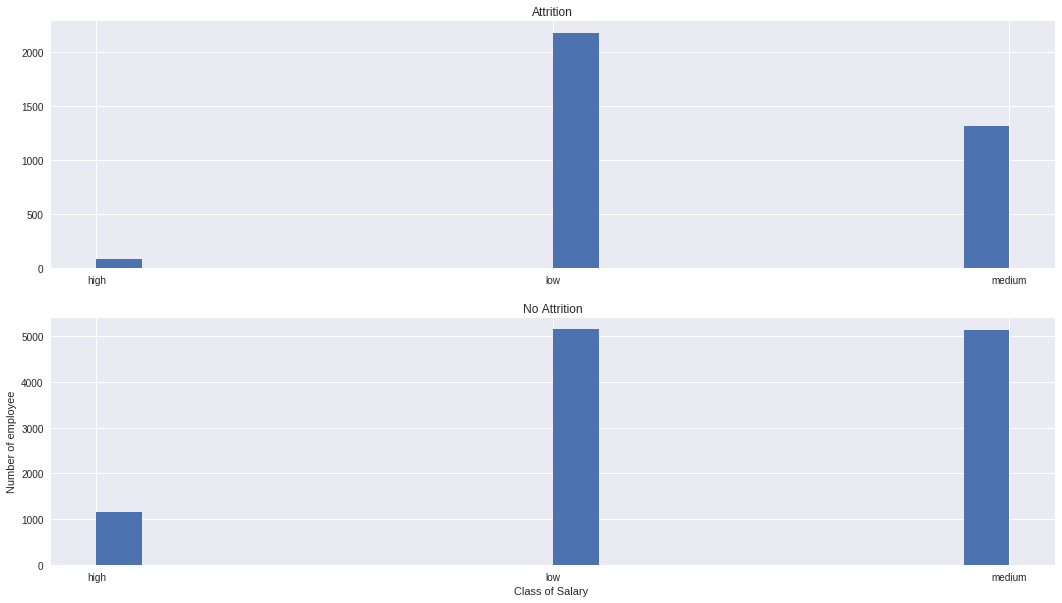

In [14]:
print(np.unique(data['salary']))
print('Class of salaries : ', len(np.unique(data['salary'])))


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))

bins = 20


ax1.hist(data.salary[data.left == 1], bins = bins)
ax1.set_title('Attrition')

ax2.hist(data.salary[data.left == 0], bins = bins)
ax2.set_title('No Attrition')

plt.xlabel('Class of Salary ')
plt.ylabel('Number of employee')
plt.show()

**Study Corrolation between features ** 

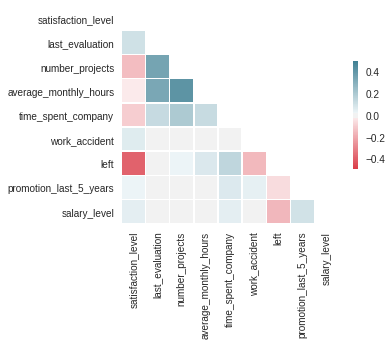

In [15]:
import seaborn as sns
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

** The variable "left" is highly correlated to the feature "satisfaction_level" and "work_accident" **



In [16]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

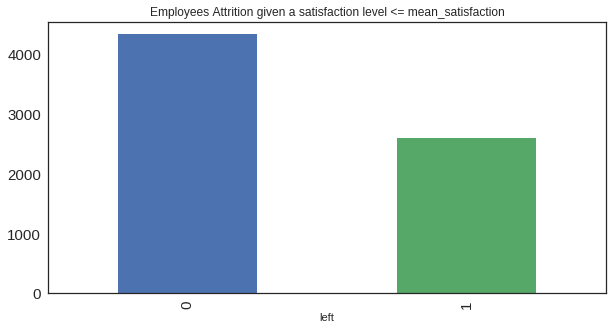

In [17]:
mean_satisfaction = data['satisfaction_level'].mean()

data.groupby('left')['satisfaction_level'].apply(lambda x: (x <= mean_satisfaction).sum()).plot.bar(
    x='left', y='count', \
    figsize=(10, 5), fontsize=15, title = 'Employees Attrition given a satisfaction level <= mean_satisfaction');

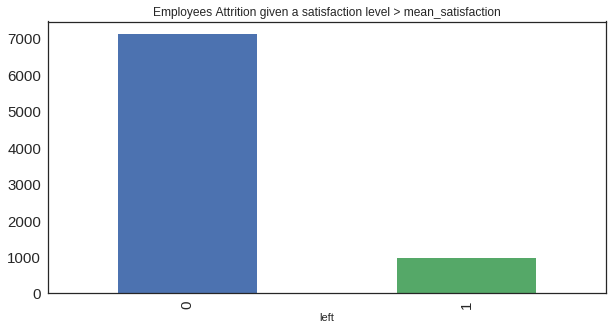

In [18]:
data.groupby('left')['satisfaction_level'].apply(lambda x: (x > mean_satisfaction ).sum()).plot.bar(
    x='left', y='count', \
    figsize=(10, 5), fontsize=15, title = 'Employees Attrition given a satisfaction level > mean_satisfaction');

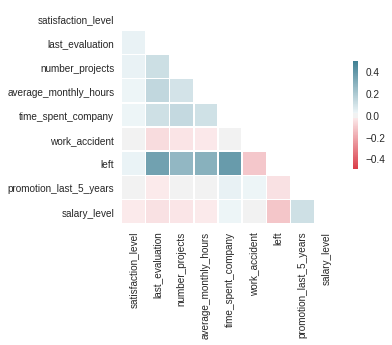

In [19]:
## plotting daigonal matrix corrolation 
#filter out people with a good last evaluation

mean_satisfaction = data['satisfaction_level'].mean()
satisfied_employees = data[data['satisfaction_level'] > mean_satisfaction]

sns.set(style="white")

# Compute the correlation matrix
corr = satisfied_employees.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Text(0,0.5,u'Number of employee')

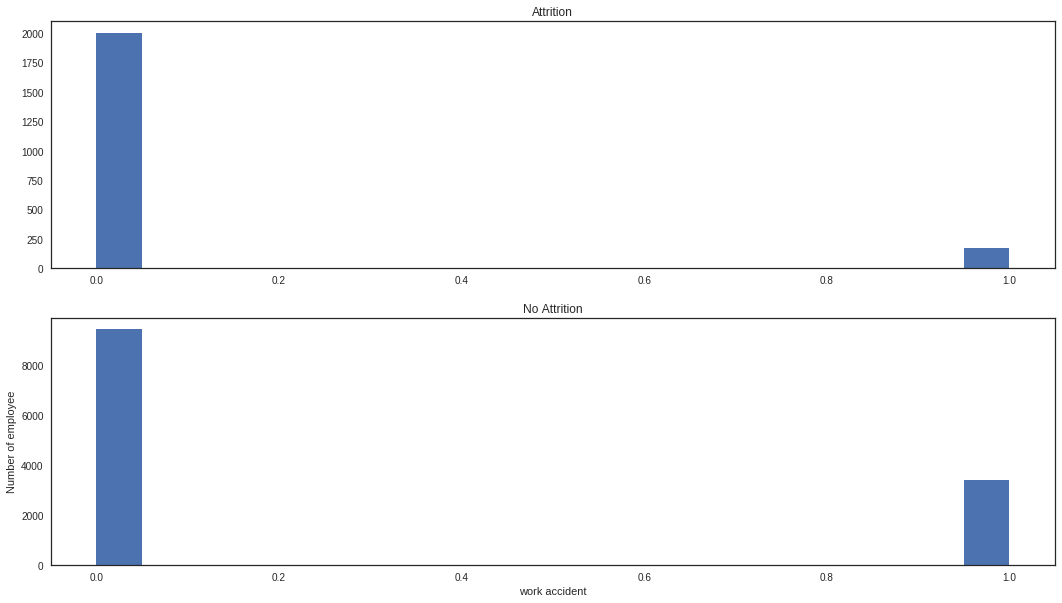

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))

bins = 20
                            
ax1.hist(data.left[data.work_accident == 1], bins = bins)
ax1.set_title('Attrition')

ax2.hist(data.left[data.work_accident == 0], bins = bins)
ax2.set_title('No Attrition')

plt.xlabel('work accident')
plt.ylabel('Number of employee')

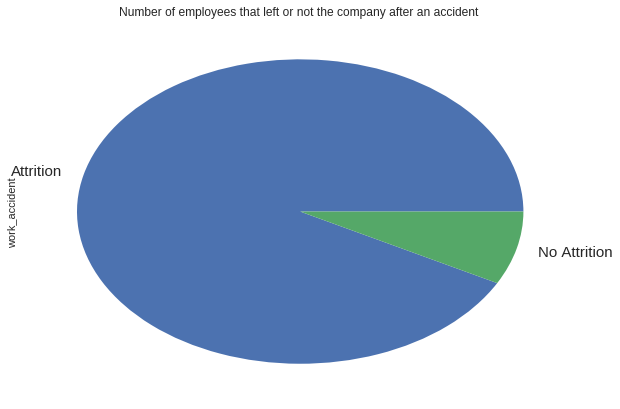

In [21]:
data.groupby('left')['work_accident'].apply(lambda x: (x == 1.0 ).sum()).plot.pie(labels = ['Attrition', 'No Attrition'],
    figsize=(10, 7), fontsize=15, title = 'Number of employees that left or not the company after an accident ');

**Study the mutual information criterion** (measure the corrolation between features : find features that are the most corrolated to the target "left") 

In [0]:
from sklearn.feature_selection import mutual_info_classif
df_left = np.array(data.left)
data.department = pd.factorize(data.department)[0]
data.name = pd.factorize(data.name)[0]
data_bis = data.drop(columns= ['left', 'salary'])
mi = mutual_info_classif(data_bis, df_left)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


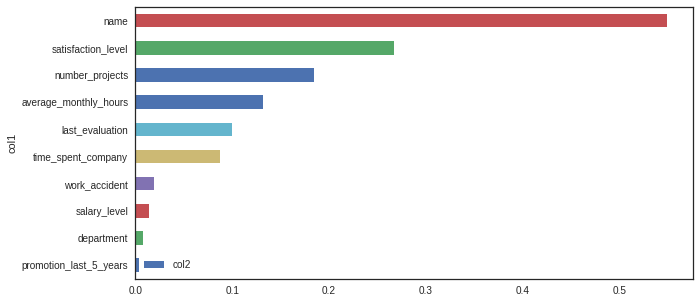

In [23]:
mi_df = pd.DataFrame({'col1':data_bis.columns,'col2':mi})
mi_df = mi_df.sort_index(by='col2', ascending=True)
mi_df.plot.barh(x='col1', y='col2', figsize=(10, 5), fontsize=10)

Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA


def factorize_catog_var(df):
  
  df['department'] = pd.factorize(df.department)[0]
  df['salary'] = pd.factorize(df.salary)[0]
  return(df)

def dumm(df):
  
  
    datanew = pd.get_dummies(df['department'])
    df = df.drop('department', axis=1)
    df = df.join(datanew)
    #add dummy variable
    df = data.join(datanew)
    
    dum_sal = pd.get_dummies(df['salary'])
    df = df.drop('salary', axis=1)
    df = df.join(dum_sal)
    df = data.join(dum_sal)
    return (df)



def scale(df):
    return(preprocessing.scale(df))

def scale_trans(df_train, df_test):
    scaler = preprocessing.StandardScaler().fit(df_train)
    return( scaler.transform(df_test))
  

# Feature Extraction with LDA



  
# Feature Extraction with PCA

def pca_fit(df):
  '''the numbuer of components may be found 
     using a grid search 
     for example we took 3'''
  
  pca = PCA(n_components=3)
  return (pca.fit(X))


# Feature Importance with Extra Trees Classifier
# which are the best features to  best classifiy

def feature_importance (X,y):
  
  '''You can see that we are given an importance score 
     for each attribute where the larger score the more 
     important the attribute. '''
  
  model = ExtraTreesClassifier()
  model.fit(X, Y)
  print(model.feature_importances_)
  return(model.feature_importances_)




def feature_importance_extractor (X,y,n):
  
  ''' Select the most n influencial features'''
  
  L = feature_importance (X,y)
  L = np.asarray(l)
  flat = ary.flatten()
  indices = np.argpartition(flat, -n)[-n:]
  indices = indices[np.argsort(-flat[indices])]
  # return a new data frame with
  # only n most important features
  
  return (X.iloc[:,indices])
